In [577]:
import gc
import time
import numpy as np
import matplotlib.pyplot as plt

class job:
    def __init__(self, phone_id, arrival_time, execution_time, upload_time):
        self.phone_id = phone_id    # 1:good    0: bad
        self.arrival_time = arrival_time
        self.execution_time = execution_time
        self.upload_time = upload_time

class station:
    def __init__(self, queue):
        self.queue = queue

In [578]:
def schedule_new_arrival():     # schedule poisson arrival
    global next_arrival_time
    if (time.process_time()  >= next_arrival_time):
        new_arrival()
        next_arrival_time = time.process_time()  + np.random.poisson( 1/arrival_rate )

def new_arrival():
    global base_station
    phone_id = np.random.randint(2)     # assign job to good/bad phones
    if phone_id == 1:
        new = job(phone_id, time.process_time() , J_g, U_g)   # initilize job
    else:
        new = job(phone_id, time.process_time() , J_b, U_b)
        
    base_station.queue.append(new)      # put in station queue


def forward_to_server():
    global base_station
    global server
    global station_status
    global station_departure_time

    if len(base_station.queue) !=0:
        if station_status:  
            station_departure_time = time.process_time()  + base_station.queue[0].upload_time
            station_status = False

        if time.process_time() >=station_departure_time:  # check if the upload is done
            server.queue.append(base_station.queue[0])      # upload to server queue
            del base_station.queue[0]       # delete from station queue
            station_status = True


def server_process():
    global delay_1
    global delay_0
    global served
    global server
    global server_status
    global server_departure_time

    index = 0

    if len(server.queue) !=0:
        if server_status:
            
            server_departure_time = time.process_time()  + server.queue[index].execution_time   # execute the job first
            server_status = False

        if time.process_time() >=server_departure_time:  # check if the upload is done
            if server.queue[index].phone_id == 1:
                delay_1 = delay_1+time.process_time() -server.queue1[index].arrival_time
            else:
                delay_0 = delay_0+time.process_time() -server.queue2[index].arrival_time

            del server.queue[index] 
            server_status = True
            served = served + 1

def initilize():

    global base_station 
    global server
    global served
    global delay_1
    global delay_0
    global J_g
    global J_b
    global U_g 
    global U_b
    global arrival_rate
    global next_arrival_time
    global station_status
    global server_status

    base_station = station([])
    server = station([])
    served = 0
    delay_1 = 0
    delay_0 = 0
    J_g = 0.01
    J_b = J_g
    U_g = 0.02
    U_b = 10*U_g
    arrival_rate = 0
    next_arrival_time = 0
    station_status = True
    server_status = True

def clear():
    for value in globals().items():
        del value
    gc.collect()


In [579]:
mean_delay_1=[]
mean_delay_0=[]
x_axis = []

for i in range(10):
    clear()
    initilize()
    arrival_rate = 5*(i+1)
    x_axis.append(arrival_rate)
    while served<=10:
        schedule_new_arrival()
        forward_to_server()
        server_process()
    
    print('iteration '+str(i)+' done')

    mean_delay_1.append(delay_1/10)
    mean_delay_0.append(delay_0/10)

iteration 0 done
iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done


[0.0953125, 0.15625, 0.40625, 0.334375, 0.4578125, 0.5, 0.5275, 0.5534375, 0.5515625, 0.6365625] [0.07, 0.1025, 0.2053125, 0.2765625, 0.341875, 0.434375, 0.4503125, 0.500625, 0.5046875, 0.55375]


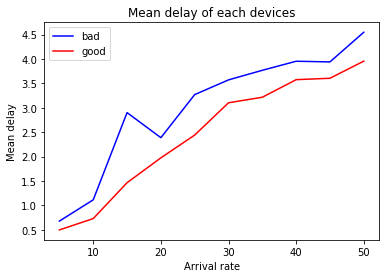

In [595]:
plt.plot(x_axis, np.asarray(mean_delay_0)/1.4*10, color='b',label='bad')
plt.plot(x_axis, np.asarray(mean_delay_1)/1.4*10, color='r',label='good')
plt.xlabel('Arrival rate')
plt.ylabel('Mean delay')
plt.title('Mean delay of each devices')
plt.legend()

In [581]:
server.queue

[]